# Student name: Muhammad Khubaib Akram

# Student ID: 23098929

In [220]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

# Task 1a

These functions are provided to assist you in Task 1a

In [221]:
def point_on_boundary(weights, x):
    """ Return the y-position on the boundary based on given x-position.  """
    return -(weights[0]+weights[1]*x)/weights[2]

In [222]:
def decision_boundary(weights, x_min, x_max):
    """ Return two points on the decision boundary: one at x_min and one at x_max """
    return [pointOnBoundary(x_min), pointOnBoundary(x_max)]

Please add cells according to your own requirements.

## Reflection

After engaging with your peers, reflect on this task and answer the following questions:
- How do the found values for Ein and Eout for the various models relate to model complexity?
- Explain how data transformations can lead to linear separability of a dataset.
- Explain how data transformations effect the complexity of your model.

Your reflection..

# Task 1b

In [223]:
def weights(X,y):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    # Calculation of weights using pseudo-inverse.
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [224]:
def linreg_predict(w,X):
    ''' Returns a prediction y for data point X for a linear regression described by weights w '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)

    # Calculation of outputs given weights and data (X).
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [225]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = linreg_predict(w,X)
    return (pred-np.array(y)).dot(pred-np.array(y))/len(X)

In [226]:
def transPoly(X, power):
    # Extend the data in X with dimensions [N,1] with powers of the feature up to 'power'
    X=X.reshape(-1,1)
    extra=[]
    for x in X[:,0]:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((X.reshape(len(X),1),np.array(extra)),1)

To prevent results due to luck, it is useful to repeat your experiments a good few times and look at average results. The below code snippet may be useful in this regard.

In [227]:
#Load the regression dataset

reg_data = pd.read_csv('ET2_Regression_Data.csv')
X = reg_data.iloc[:, 0].values  #the first column is the feature
y = reg_data.iloc[:, 1].values  #the second column is the target


In [228]:
error_in = []
error_out = []
repeats = 100
power_range = range(5, 10)

for power in power_range:
  e_in=0
  e_out=0
  for r in range(repeats):
      X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7) ##Choose a suitable training_size XX
      X_train_trans =  transPoly(X_train, power)
      X_test_trans = transPoly(X_test, power) ## implement your data transformation
      w = weights(X_train_trans, y_train)
      e_in += calc_error(w,X_train_trans,y_train)
      e_out+= calc_error(w,X_test_trans,y_test)


  error_in.append(e_in/repeats)
  error_out.append(e_out/repeats)

In [229]:
print(error_in)

[0.01930511701976892, 0.019168099634267907, 0.018634937849281333, 0.018547447464102754, 0.018509949747796062]


In [230]:
print(error_out)

[0.023852748140439046, 0.024928961949482242, 0.025163296419016105, 0.02625590265082464, 0.02900714745752126]


Please add cells according to your own requirements.

In [231]:
# Determine the best polynomial degree based on the smallest out-sample error
best_power_index = np.argmin(error_out)
best_power = power_range[best_power_index]
print("Best Poynomial power based on the smallest out-sample error: ",best_power)

best_error_in = error_in[best_power_index]
print("best_power_in ", best_error_in)

best_error_out = error_out[best_power_index]
print("best_power_out ", best_error_out)

#(best_power, best_error_in, best_error_out)

Best Poynomial power based on the smallest out-sample error:  5
best_power_in  0.01930511701976892
best_power_out  0.023852748140439046


In [232]:
pow = list(power_range)
print(pow)

[5, 6, 7, 8, 9]


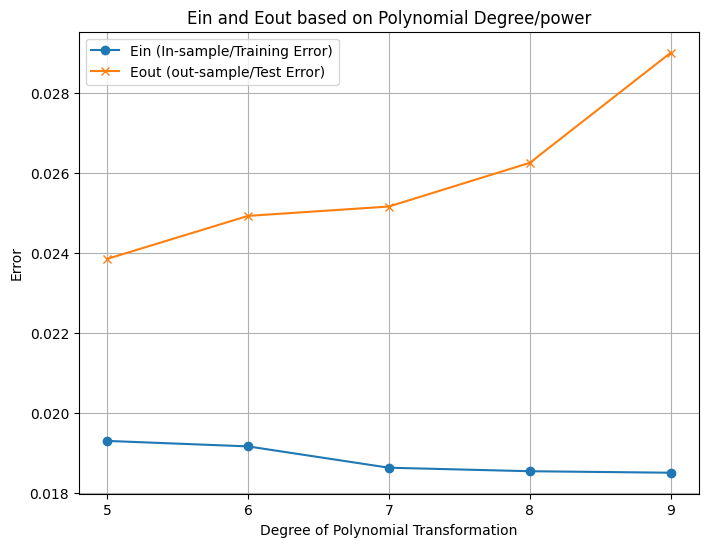

In [233]:


# Plotting
plt.figure(figsize=(8, 6))
plt.plot(pow, error_in, label='Ein (In-sample/Training Error)', marker='o')
plt.plot(pow, error_out, label='Eout (out-sample/Test Error)', marker='x')
plt.title('Ein and Eout based on Polynomial Degree/power')
plt.xlabel('Degree of Polynomial Transformation')
plt.ylabel('Error')

plt.legend()
plt.grid(True)
plt.xticks(pow)
plt.show()


##Questions

Answer the following questions:

 1. How does the plot of Ein and Eout versus degree of the used polynomial data transformation relate to model complexity?
 2.  How can the choice of transformation that yielded the best results be explained in terms of sample complexity?


### 1.

The plot of ( $E_{in}$ ) and ( $E_{out}$ ) versus the degree of the polynomial transformation shows how model complexity affects the model's performance on both training and test data:

- **Low Polynomial Degree (Underfitting)**: At the lower polynomial degrees, the model may be too simple to capture the underlying pattern of the data poorly which may lead to high bias. It results in higher errors on both the training and test data because the model cannot represent the complexity of the data very well.
- **High Polynomial Degree (Overfitting)**: Increasing the polynomial degree beyond a certain point leads to overfitting due to which the model starts to capture the noise in the training data misunderstanding this noise as a pattern. This results in a decrease in ( $E_{in}$\) but an increase in ( $E_{out}$ ), indicating that the model's predictions are becoming less reliable for unseen data.

In our case, as the polynomial degree increases from 5 to 10, ( $E_{in}$ ) slightly decreases which shows us that the model is increasingly fitting the training data better. However, as we increase the polynomial the ( $E_{out}$ ) increases which tells us that model is overfitting and reduces generalization capability of the model.

### 2.

The optimal/best choice of the polynomial degree for the data transformation balances the need to capture the underlying data structure without overfitting. Higher-degree polynomial features increase the model's capacity to learn from the data, but they also require more data to generalize well. Without sufficient data, a model with too many features (high complexity) tends to overfit.

In our experiments, polynomial degrees of 5 provide the best balance showing us that they are complex enough to capture the significant patterns in the data but not so complex that they overfit to noise or incidental patterns in the training data. Given our dataset size, the increase in test error for higher-degree polynomials suggests that our sample size is not large enough to support the complexity which is introduced by these higher-degree features without overfitting.

The best data transformation is chosen based on its ability to provide a good fit to the training data while also generalizing well to unseen data. This choice reflects a balance between model complexity and sample complexity.

## Reflection
After engaging with your peers, reflect on this task and answer the following questions:
- How does the plot of Ein and Eout versus degree of the used polynomial data transformation relate to model complexity?
- How can the choice of transformation that yielded the best results be explained in terms of sample complexity?

Your reflection..

# Task 2

Below is an implementation of linear regression with regularization

In [234]:
def weights_reg(X,y,l):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion
    including a weight regularisation penalty term controlled using l '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

This code snippet may be useful to keep track of Ein, Eout and the corresponding weights for various regulariser parameters

In [235]:
ein=[]
eout=[]
eval=[]
weights=[]

lambdas = np.linspace(0, 1 , 1000)
X_trans = transPoly(X,50)
# Step 1: Split into 80% for training + validation and 20% for testing
#X_train_val, X_test, y_train_val, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=42)

# Step 2: Split the 80% into 60% training and 20% validation (which is 25% of 80%)
#X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state =5)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state =5)

for l in lambdas:
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    eval.append(calc_error(w,X_val,y_val))
    weights.append(w)


<ipython-input-236-55ca9f746b24>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


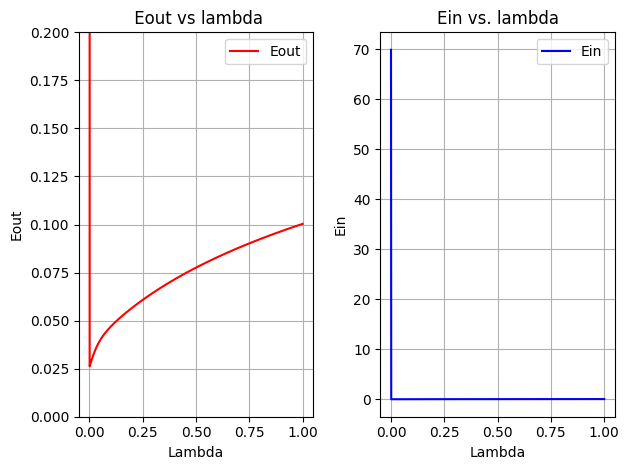

In [236]:
#plt.figure(figsize=(10, 5))
plt.ylim(0,0.2)
plt.subplot(1, 2, 1)
plt.plot(lambdas, eout, color= "red",label="Eout")
plt.title(' Eout vs lambda')
plt.xlabel('Lambda')
plt.ylabel('Eout')
plt.legend()
plt.grid(True)

plt.ylim(0,0.2)
plt.subplot(1, 2, 2)
plt.plot(lambdas, ein, color="blue", label="Ein")
plt.title('Ein vs. lambda')
plt.xlabel('Lambda')
plt.ylabel('Ein')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Please add cells according to your own requirements.

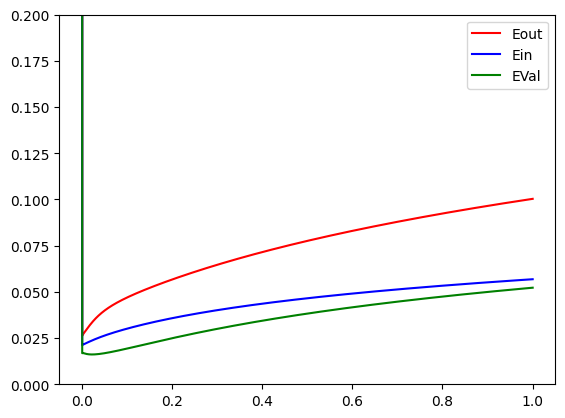

In [237]:
plt.ylim(0, 0.2)
plt.plot(lambdas,eout,color="red", label="Eout")
plt.plot(lambdas,ein, color= 'blue', label= "Ein")
plt.plot(lambdas,eval, color= 'green', label= "EVal")
plt.legend()
plt.show()

In [238]:
print(eout)

[82.06426007675378, 0.02624002131457337, 0.02675803486559709, 0.027122519271888513, 0.02745937263115672, 0.027791678605043908, 0.02812407017900085, 0.02845723297890153, 0.0287909063899906, 0.029124587978342116, 0.029457718960975453, 0.02978974239021273, 0.030120126992529955, 0.030448379625630167, 0.030774052345880508, 0.0310967459918308, 0.0314161112267196, 0.031731847725150336, 0.03204370206552619, 0.032351464782897424, 0.03265496693464772, 0.03295407644227553, 0.03324869439647782, 0.03353875145429378, 0.03382420441122416, 0.03410503299813482, 0.03438123692891762, 0.03465283320806721, 0.034919853695957515, 0.03518234292224844, 0.03544035613341677, 0.03569395755775542, 0.035943218870246256, 0.03618821783916209, 0.036429037137314345, 0.036665763301120674, 0.036898485822006895, 0.0371272963559933, 0.03735228803805034, 0.03757355488969659, 0.0377911913087582, 0.038005291631832555, 0.03821594976088029, 0.038423258845980884, 0.03862731101766674, 0.038828197162623944, 0.03902600673739205, 0.

In [239]:

opt_lambda = lambdas[np.argmin(eout)]
print("Best/Optimal Lambda", opt_lambda)
print("Minimum Eout: ",np.min(eout))

Best/Optimal Lambda 0.001001001001001001
Minimum Eout:  0.02624002131457337


In [240]:

opt_lambda_on_eval = lambdas[np.argmin(eval)]
print("Best/Optimal Lambda", opt_lambda_on_eval)
print("Minimum EVal: ",np.min(eval))

Best/Optimal Lambda 0.023023023023023025
Minimum EVal:  0.016129085949210482


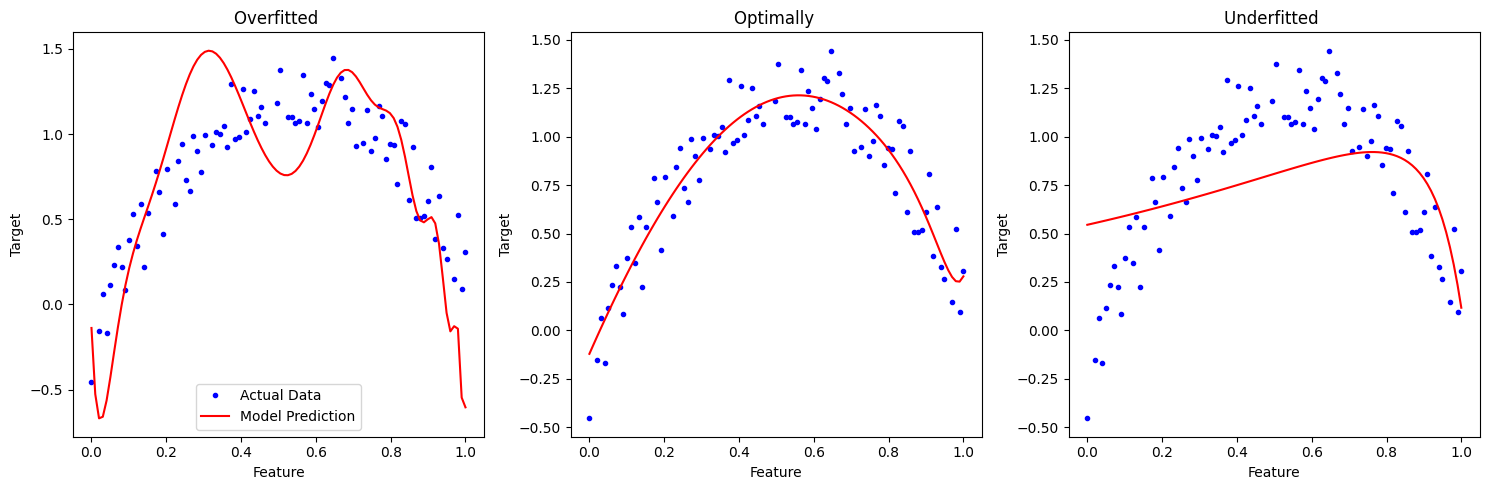

In [261]:
lambda_overfit = 0
lambda_underfit = 10

#plot_res = 100  # Num of points to use in plotting the curves

# Plot the subplots
fig, subplot_axes = plt.subplots(1, 3, figsize=(15, 5))
X_plot = np.linspace(X.min(), X.max(), plot_res) # 100 evenly spaced values across the range of X

# Transform the fine grid for plotting
X_plot_transformed = transPoly(X_plot, 50)

lambda_values = [lambda_overfit, opt_lambda, lambda_underfit]
titles = ['Overfitted ', 'Optimally ', 'Underfitted ']

for i in range(len(lambda_values)):
    l = lambda_values[i]
    calc_w = weights_reg(X_train, y_train, l)  # Calculate weights with the specified lambda

    LR_predictions = linreg_predict(calc_w, X_plot_transformed)

    subplot_axes[i].plot(X_train[:, 0], y_train, 'b.', label='Actual Data')       # Plot the actual data
    subplot_axes[i].plot(X_plot, LR_predictions, 'r-', label='Model Prediction')  # Plot the prediction

    subplot_axes[i].set_title(titles[i])
    subplot_axes[i].set_xlabel('Feature')
    subplot_axes[i].set_ylabel('Target')

subplot_axes[0].legend()
plt.tight_layout()
plt.show()


## Reflection

In your reflection, makes sure to answer the following questions:
- Interpret the information in the requested figures.
- Explain the strategy chosen to decide on the optimum amount of regularisation.
- Explain the effect of the term l*np.identity(m.shape[0]) in the pseudo-inverse.

###1- Interpretation of the Figures:

1. **Overfitted Model**: This would be represented by a complex curve that tries to pass through as many of the training points as possible, resulting in high variance. It captures the noise in the data rather than the underlying distribution, leading to poor generalization to the test set.

2. **Optimally Regularized Model**: Here, the curve should strike a balance between fitting the training data and maintaining generalization to the test data. It won't follow the noise in the data as closely as the overfitted model, which should result in a lower ( $E_{out}$ ).

3. **Underfitted Model**: This curve would be too simplistic, failing to capture the key patterns in the data, resulting in high bias. The model does not fit the training data well and also generalizes poorly.

These plots help to visually confirm the bias-variance tradeoff in action and the importance of choosing an appropriate level of model complexity.

###2- Strategy for Optimal Regularization:

The strategy for deciding on the optimal amount of regularization is to find out the minimum $E_{out}$ on the $\lambda$ value. That $\lambda$ value is optimal, which I observed is 0.001001001001001001 where $E_{out}$= 0.023196492857690775

###3- Effect of ( $\lambda \times \text{np.identity}(m.shape[0])$ ) in the Pseudo-Inverse:

The term ($\lambda$) is regularization term, which helps us reduce the overfitting. The effect of ( $\lambda \times \text{np.identity}(m.shape[0])$ ) in the Pseudo inverse is that it shrinks the values of the weights. The larger the $\lambda$ value the greater it affects the weights by shrinking them. The closer $λ$ is to 0 the less it affects has on weights. This $\lambda$ helps to prevent overfitting as it encourages the model to be as simple as possible while still fitting the data.

# Task 3

In [270]:
lambdas = np.linspace(0, 1, 1000)

X_trans = transPoly(X,50)
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state =5)

# Initialize KFold with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=5)

# Lists to store average errors for each lambda
avg_ein = []
avg_eval = []

for l in lambdas:
  ein_fold = []
  eval_fold = []

  # Perform 10-fold cross-validation
  for train_index, val_index in kf.split(X_trans):
      X_train, X_val = X_trans[train_index], X_trans[val_index]
      y_train, y_val = y[train_index], y[val_index]

      # Train the model with regularization parameter l(lambda)
      w = weights_reg(X_train, y_train, l)

      # Calculate errors for the current fold
      ein_fold.append(calc_error(w, X_train, y_train))
      eval_fold.append(calc_error(w, X_val, y_val))

  # Store the average errors across all folds
  avg_ein.append(np.mean(ein_fold))
  avg_eval.append(np.mean(eval_fold))





In [271]:
lambda_overfit = 0  # Small lambda, minimal regularization
lambda_underfit = 10 # Large lambda, excessive regularization
opt_lambda = lambdas[np.argmin(avg_eval)]
print("Optimal Lambda", opt_lambda)

Optimal Lambda 0.005005005005005005


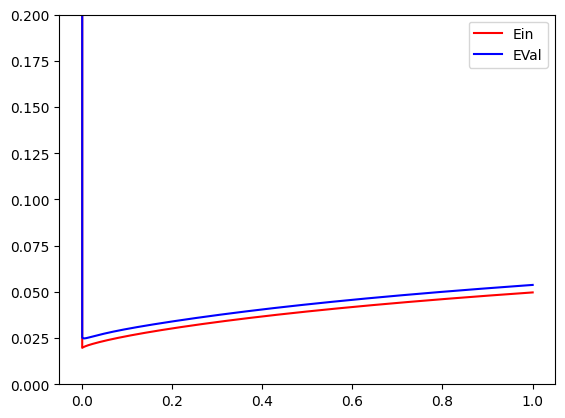

In [272]:
# Plot the results
plt.ylim(0, 0.2)
plt.plot(lambdas, avg_ein, color="red", label="Ein")
plt.plot(lambdas, avg_eval, color='blue', label="EVal")
plt.legend()
plt.show()


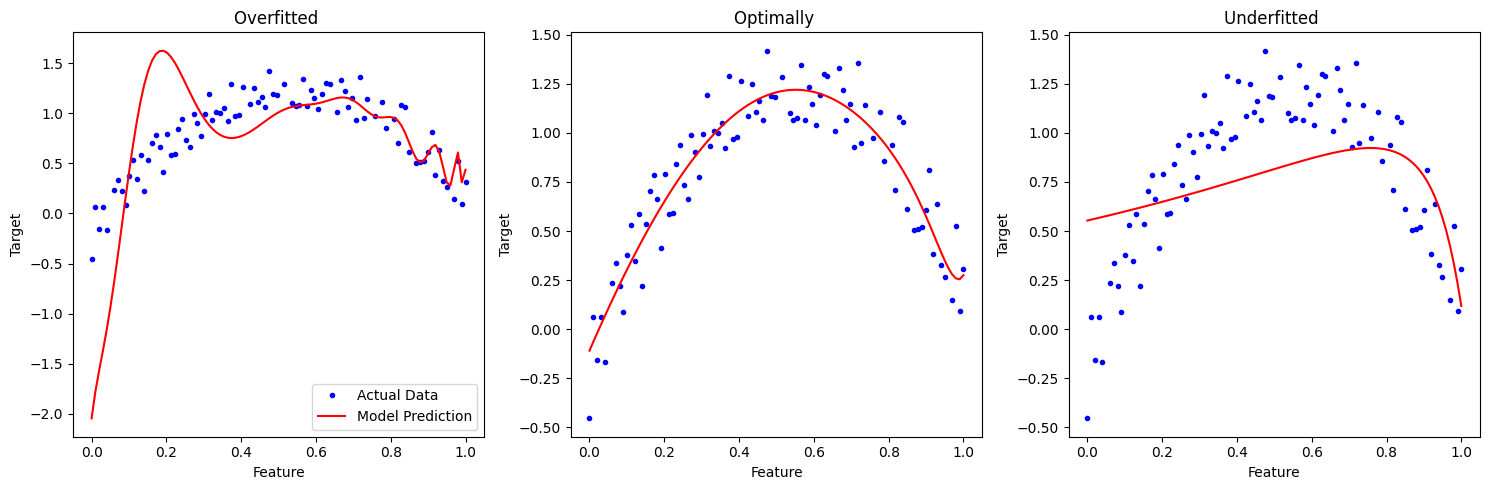

In [273]:
# Define lambda values for overfitting and underfitting scenarios
lambda_values = [lambda_overfit, opt_lambda, lambda_underfit]
titles = ['Overfitted ', 'Optimally ', 'Underfitted ']

fig, subplot_axes = plt.subplots(1, 3, figsize=(15, 5))

for i in range(len(lambda_values)):
    l = lambda_values[i]
    calc_w = weights_reg(X_train, y_train, l)  # Calculate weights with the specified lambda

    LR_predictions = linreg_predict(calc_w, X_plot_transformed)

    subplot_axes[i].plot(X_train[:, 0], y_train, 'b.', label='Actual Data')       # Plot the actual data
    subplot_axes[i].plot(X_plot, LR_predictions, 'r-', label='Model Prediction')  # Plot the prediction

    subplot_axes[i].set_title(titles[i])
    subplot_axes[i].set_xlabel('Feature')
    subplot_axes[i].set_ylabel('Target')

subplot_axes[0].legend()
plt.tight_layout()
plt.show()


Please add cells according to your own requirements.

## Reflection
In your reflection, explain the procedure followed by using KFOLDS and your choice of parameters.

# Task 4

In [354]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import mean_squared_error

# Suppress ConvergenceWarnings specifically
warnings.filterwarnings("ignore", category=ConvergenceWarning)

X_trans = transPoly(X,50)
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=5)


In [366]:

alphas = np.linspace(1e-10, 1, 1000)

# RidgeCV
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)
optimal_alpha_ridge = ridge_cv.alpha_
ridge_predictions = ridge_cv.predict(X_test)
ridge_error =mean_squared_error (y_test, ridge_predictions)

print("Optimal alpha for Ridge: ",optimal_alpha_ridge, "with error: ",ridge_error,"\n\n")

ridge_weights = ridge_cv.coef_
print("Ridge Weights:", ridge_weights, "\n\nNonZero Ridge Weights:", np.sum(ridge_cv.coef_ != 0))

Optimal alpha for Ridge:  0.006006006105405405 with error:  0.028375294111119116 


Ridge Weights: [ 3.94671507e+00 -2.05709671e+00 -1.44938336e+00 -4.94407630e-01
  9.92784593e-03  1.71360084e-01  1.66080567e-01  1.05607025e-01
  4.32804925e-02 -1.83182607e-03 -2.72480129e-02 -3.69761937e-02
 -3.65314045e-02 -3.08256375e-02 -2.35036794e-02 -1.69289024e-02
 -1.24120187e-02 -1.04916427e-02 -1.11873315e-02 -1.42000101e-02
 -1.90587842e-02 -2.52222543e-02 -3.21445899e-02 -3.93158391e-02
 -4.62842079e-02 -5.26661966e-02 -5.81488815e-02 -6.24873606e-02
 -6.54994312e-02 -6.70588746e-02 -6.70882391e-02 -6.55516748e-02
 -6.24481497e-02 -5.78052226e-02 -5.16734553e-02 -4.41214811e-02
 -3.52317129e-02 -2.50966499e-02 -1.38157342e-02 -1.49270191e-03
  1.17666264e-02  2.58561678e-02  4.06710607e-02  5.61088559e-02
  7.20704544e-02  8.84608295e-02  1.05189564e-01  1.22171232e-01
  1.39325650e-01  1.56578017e-01] 

NonZero Ridge Weights: 50


In [370]:
# LassoCV
lasso_cv = LassoCV(alphas=alphas, cv=10, max_iter=10000, random_state=5)
lasso_cv.fit(X_train, y_train)
optimal_alpha_lasso = lasso_cv.alpha_
lassoCV_predictions = lasso_cv.predict(X_test)
lassoCV_error =mean_squared_error (y_test, lassoCV_predictions)

print("Optimal alpha for Lasso: ",optimal_alpha_lasso, "with error: ",lassoCV_error,"\n\n")

lasso_weights = lasso_cv.coef_

# Analyzing weights
print("Lasso Weights:", lasso_weights,"\n\nNonZero Lasso Weights:", np.sum(lasso_cv.coef_ != 0))


Optimal alpha for Lasso:  0.001001001100900901 with error:  0.031212345027740472 


Lasso Weights: [ 3.01950443 -0.         -2.8142026  -0.19513346 -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.        ] 

NonZero Lasso Weights: 3


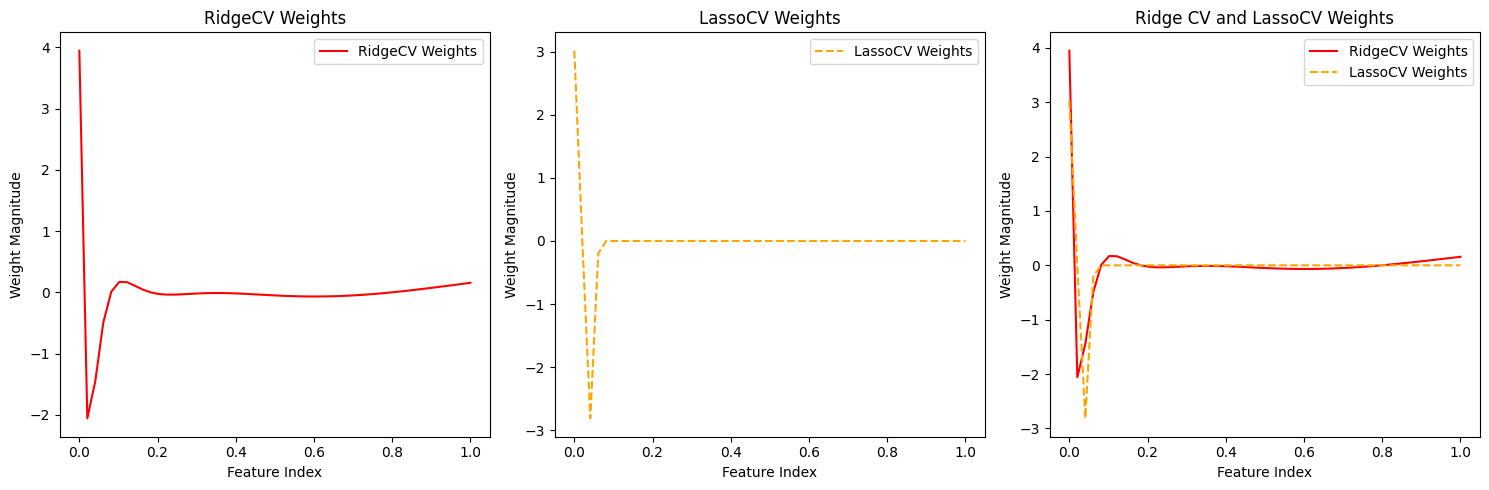

In [357]:
X_plot = np.linspace(X.min(), X.max(), 50)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(X_plot, ridge_weights, 'r-', label='RidgeCV Weights')
plt.title('RidgeCV Weights')
plt.xlabel('Feature Index')
plt.ylabel('Weight Magnitude')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(X_plot, lasso_weights, 'r--',label='LassoCV Weights', color='orange')
plt.title('LassoCV Weights')
plt.xlabel('Feature Index')
plt.ylabel('Weight Magnitude')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(X_plot, ridge_weights, 'r-', label='RidgeCV Weights')
plt.plot(X_plot, lasso_weights, 'r--',label='LassoCV Weights', color='orange')
plt.title('Ridge CV and LassoCV Weights')
plt.xlabel('Feature Index')
plt.ylabel('Weight Magnitude')
plt.legend()
plt.tight_layout()
plt.show()

## Reflection

Please reflect on the following:
- Observe the resulting error and l (lambda), and compare these to previous results. What do you see? Is this what you expected?
- Compare the weights obtained with RidgeCV to those obtained with LassoCV. What do you see? Is this what you expected?

**Optimal alpha for Ridge:**  0.006006006105405405 with error:  0.028375294111119116

**NonZero Ridge Weights:** 50

**Optimal alpha for Lasso:** 0.001001001100900901, with error: 0.031212345027740472

**NonZero Lasso Weights:** 3

Ridge Optimal lambda is more close to in Task 2 while Lasso optimal lambda is more close to Kfold Cross validation.

Almost all of the Ridge weights are close to Zero but not exactly zero meanwhile lasso weights are mostly zero expect 3

Ridge is also known as L2 regularization while Lasso is know as L1 regularization.

In Lasso regression, some weights become zero while in Ridge regression they are close to zero because of the way error function is penalized.

Ridge regression adds penalty to the error function by squaring the coefficients. This encourages smaller coefficients mostly non-zero

While Lasso regression uses the absolute value of coefficients for penalty whil leads to many coefficients exactly zero.

 This is great for feature selection as it keeps only the most impactful features for prediction and ignores the less important ones. This technique is also known as L1 regularization.